<h1>Preparacion de Datos Proyecto 2</h1>
<h2>Grupo 5</h2>


<h3>Contexto</h3>

EcoAlpes está realizando experimentos para estudiar cómo el cambio climático impacta en los ecosistemas terrestres. Se han recopilado datos sobre diferentes variables de plantas, como especie, condiciones de luz y tratamientos microbianos. Se busca aplicar técnicas de aprendizaje automático para identificar patrones en los datos y entender cómo estas variables afectan el crecimiento de las plantas, con el fin de apoyar la gestión sostenible de los bosques y la preservación de la biodiversidad.

<h3>Parte 1: Definicion del enfoque analítico</h3>

Tipo de Aprendizaje: No supervisado.

Tarea de Aprendizaje: Clustering.

Justificación: Se busca agrupar las plantas en grupos o clusters basados en similitudes en sus características y así descubrir patrones en los datos que puedan identificar posibles relaciones entre las características de las plantas, su entorno de crecimiento, los elementos específicos del experimento y el hecho de sobrevivir o no. Esto permitirá determinar la tolerancia de las plantas a la sombra en dichas condiciones.

Algoritmo de aprendizaje: K-Means. 

Justificación elección de algoritmo: K-Means es un algoritmo que agrupa los datos en K clusters, donde K es un parámetro que se elige antes de ejecutar el algoritmo. La flexibilidad para elegir el número de clusters permite explorar diferentes estructuras de agrupamiento en los datos y puede ayudar a identificar la cantidad óptima de grupos que mejor representan los patrones naturales en los datos. 

En síntesis, el agrupamiento nos permitirá descubrir patrones y estructuras ocultas en los datos que podrían no ser evidentes a simple vista. Al identificar grupos de plantas con características similares, podemos obtener informacióon valiosa sobre cómo diferentes condiciones afectan a diferentes tipos de plantas. Esta información puede ser crucial para la toma de decisiones en la gestión sostenible de los bosques y la preservación de la biodiversidad, ya que permitirá a EcoAlpes identificar áreas de vulnerabilidad, evaluar la resistencia de diferentes especies a ciertas condiciones ambientales así como  diseñar estrategias de conservación y determinar la tolerancia de las plantas a la sombra en dichas condiciones.

<h3>Parte 2: Limpieza y preparacion de los datos</h3>

<h4>Descripción de los datos</h4>

* Análisis de los datos: contienen 1207 registros y 13 variables diferentes.

* Variables y tipos de datos: contiene 13 variables de las cuales 9 de ellas son numéricas. 

* 4 son variables categóricas. 

* Variables Numéricas:

A continuación se menciona alguna información relevante sobre las variables numéricas:

LIG_Imp, posee una desviación estándar que sugiere una alta variabilidad de los datos (γ1 = 20.08628557) aproximadamente).

AMF_Imp posee un 16,2% de ceros. 



<h4>Exploración de los datos:</h4>

Outliers: se presentan outliers en 'AMF_Imp' con respecto al diccionario de datos ya que se encuentran valores negativos para un porcentaje, lo cual no es posible. En cuanto a 'LIG_Imp' también se encuentran outliers ya que se encontraron valores máximos de 1354, lo cual no tiene sentido con el diccionario de datos ya que estamos hablando de un porcentaje.

<h4>Calidad de los datos:</h4>

Datos Duplicados: Se identificaron 0 datos duplicados en el conjunto de datos.

Datos incompletos o vacíos: Se encontraron datos vacíos correspondientes al 13,8%, lo que representa aproximandamente 2168 celdas

Datos categóricos en variables numéricas: Evento es un dato categórico que está representado con variable numérica. Esto se tendrá en cuenta para el tratamiento de los datos con el fin de que el resultado final del modelo sea representativo.

Problemas de validez de datos: Se encontraron problemas en la variable 'Cosecha'(como se observa en el apartado 1.2.4), ya que al parecer ya que al parecer hay datos que no corresponden a un valor válido según el diccionario de datos. Teniendo en cuenta que es un error que no se presenta en una proporción significativa, se planean eliminar los pocos datos que lo cometan ya que por el momento no se puede hablar con el cliente para aclarar dudas de digitación.

<h4>Entendimiento de datos:</h4>

Datos duplicados: Se eliminan los datos duplicados

Datos incompletos o vacíos: NSC se borra ya que la gran mayoría de la columna se encuentra vacía. Por otra parte, los datos incompletos de las demás categorías se imputan con la moda o la media (dependiento si la variable es categórica o numérica).

'No' se elimina ya que no contribuyen al modelo, pues una es un identificador.

Se eliminan los valores atípicos ya que pueden afectar negativamente al modelo.

Finalmente, el conjunto de datos posee 1207 registros y 17 variables. Es importante resaltar que el número de variables aumentó al realizar el proceso de transformación de las variables categóricas a numéricas mediante el uso de 'One-Hot' Sin embargo, esta solo es una nueva manera de representar la misma información que se tenía inicialmente, por lo que no debería afectar el resultado final del modelo.

<h3>Parte 3: Resultados Finales</h3>

<h4>Análisis cualitativo</h4>

* Se puede evidenciar que el número ideal de agrupaciones es 2. Cuando se hace esta agrupación se puede ver que los grupos son relativamente homogéneos.

* Se puede observar que existe una relación entre el porcentaje de colonización de AMF y el porcentaje de masa seca de lignina. De igual forma existen relaciones entre los niveles de luz y la supervivencia de la plántula.

Al revisar la gráfica de Evento con Lignina se puede notar que hay 2 grupos distintos en el conjunto de datos:

* En el grupo 0 se encuentran las cosechadas, y las que tienen el experimento finalizado; mientras que en el grupo 1 se encuentran las muertas.


<h4>Análisis cuantitativo</h4>

Se tiene un valor de silueta de 0,64 , lo cual indica que los grupos 0 y 1 están bien definidos entre sí, esto se confirma con el uso de la métrica del codo, el cual nos confirma que dos es el número óptimo de clusters en este caso. 

Teniendo en cuenta los distintos análisis a lo largo de este cuaderno, puede concluirse que la agrupación utilizada es óptima para el ejercicio sin embargo se pueden investigar diferentes variaciones en la selección de variables para observar posiblemente mejores grupos.


<h4>Recomendaciones Finales</h4>

Teniendo en cuenta los resultados obtenidos en este modelo, se recomienda intentar nuevas variaciones con diferentes variables, las cuales en este cuaderno por restricciones de tiempo no se exploraron. Por ahora el coeficiente silueta no es tan malo pero se cree que por la naturaleza de los datos se puede mejorar.

<h4> 0. Carga de librerías necesarias para implementación y carga de datos</h4>

In [42]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ydata_profiling as pp

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder



from ydata_profiling import ProfileReport

from matplotlib import cm

import warnings
# Ignorar la advertencia RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.", category=FutureWarning)

In [43]:
# Se cargan los datos. 
df_plantas = pd.read_csv('Datos_examen 1.csv',  sep=';',encoding="ISO-8859-1")
# se carga el diccionario
df_diccio = pd.read_excel('Diccionario_examen 1.xlsx')

<strong><h4>1. Entendimiento de los datos</h4></strong>

Para entender los datos se considera importante entender la cantidad de datos que se tiene, verificar cuantas columnas y filas tienen los datos proporcionados

In [44]:
df_dim = df_plantas.shape
print(">> El dataframe contiene {} columnas y {} filas\n".format(df_dim[1], df_dim[0]))
print(">> El dataframe se ve de la siguiente forma: ")
df_plantas.head()

>> El dataframe contiene 13 columnas y 1207 filas

>> El dataframe se ve de la siguiente forma: 


No Especie   Luz   Microbio  Cosecha  Tiempo  Evento  NSC  Lignina  \
0   8    Acsa  Baja  Combinado      3.0      21       0  NaN     9.11   
1  10    Acru  Baja  Combinado      3.0      21       0  NaN     4.66   
2  22    Acne  Baja  Combinado      NaN      22       1  NaN      NaN   
3  23    Acne  Baja  Combinado      9.0      63       0  NaN     9.87   
4  32    Acsa  Baja  Combinado      6.0      42       0  NaN    14.51   

   AMF_Imp  PHN_Imp  NSC_Imp  LIG_Imp  
0    55.07    -0.05     5.64     9.11  
1    36.00    -0.01     6.37     4.66  
2    64.93     0.03     7.65     8.34  
3    71.00     0.00     8.02     9.87  
4    62.00     0.13    11.11    14.51

Es importante entender de qué se trata cada columna y si son coherentes las columnas propuestas a las que realmente se tiene, por lo tanto, para entender los datos de mejor forma, es se busca entender qué significa cada uno de estos con el diccionario proporcionado.

In [45]:

pd.set_option('display.max_colwidth', None)
df_diccio.rename(columns={'ï»¿Variable name': 'Column'}, inplace=True)
print(">> El diccionario de datos es el siguiente: ")
df_diccio[['Columna', 'Descripción']]

>> El diccionario de datos es el siguiente: 


Columna  \
0                                        No   
1                                   Especie   
2                                       Luz   
3                                 Microbios   
4                                   Cosecha   
5                                    Tiempo   
6                                    Evento   
7                                       NSC   
8                                   Lignina   
9                                   AMF_imp   
10                                  PHN_imp   
11                                  NSC_imp   
12                                  LIG_imp   
13                                      NaN   
14  Los datos ausentes se codifican como NA   

                                                                                                                                                                                           Descripción  
0                                                                                                                                                       Número de identificación único de la plántula.  
1   Especies de árboles templados que coexisten en el mismo bosque, pertenecen al mismo género, pero varían en tolerancia a la sombra (Acsa = Acer saccharum, Acru = Acer rubrum, Acne = Acer negundo)  
2                                                 Luz: Los niveles de luz se crearon utilizando tela de sombra sobre los bancos del invernadero (Baja = 2% plena luz sola, Alta = 30% plena luz solar)  
3                                                                                  Filtrados microbiano que se obtuvieron mediante el método de tamizado húmedo  (Pequeño, Grande, Combinado, Control)  
4                                                                                          Momento (en semanas) en que se cosechó la plántula (si es que se cosechó) para medición ( 3, 6 o 9 semanas)  
5                                                                                                   Número de días del experimento en los que la plántula se cosechó, murió o finalizó el experimento.  
6                                Se utiliza en el análisis de supervivencia para indicar el estado de cada plántula individual en un momento dado (0 = cosechada o experimento finalizado, 1 = muerta)  
7                                                                                                                                           Porcentaje de masa seca de carbohidratos no estructurales.  
8                                                                                                                                                                  Porcentaje de masa seca de lignina.  
9                                                    Porcentaje de colonización de AMF, imputado a partir de los datos medidos para los análisis de las relaciones de los rasgos con la supervivencia.  
10                                                                       Contenido fenólico, imputado a partir de datos medidos para el análisis de las relaciones de los rasgos con la supervivencia.  
11                                    Porcentaje de masa seca de carbohidratos no estructurales, imputado a partir de datos medidos para el análisis de las relaciones de rasgos con la supervivencia.  
12                                                             Porcentaje de masa seca de lignina, imputado a partir de datos medidos para el análisis de las relaciones entre rasgos y supervivencia.  
13                                                                                                                                                                                                 NaN  
14                                                                                                                                                                                                 NaN

En este punto se puede entender que el 'No' es el identificador único. Los valores de cosecha deben ser entre  3, 6 o 9 semanas. Los valores de evento tienen que ser entre 0 o 1.

<h5>1.1. Entendimiento de contenido</h5>

Se visualizan las variables para identificar tendencias, correlaciones y posibles valores atípicos que pueden afectar nuestro proceso de análisis y toma de decisiones. 

>> Se visualizan los datos en conjunto: 


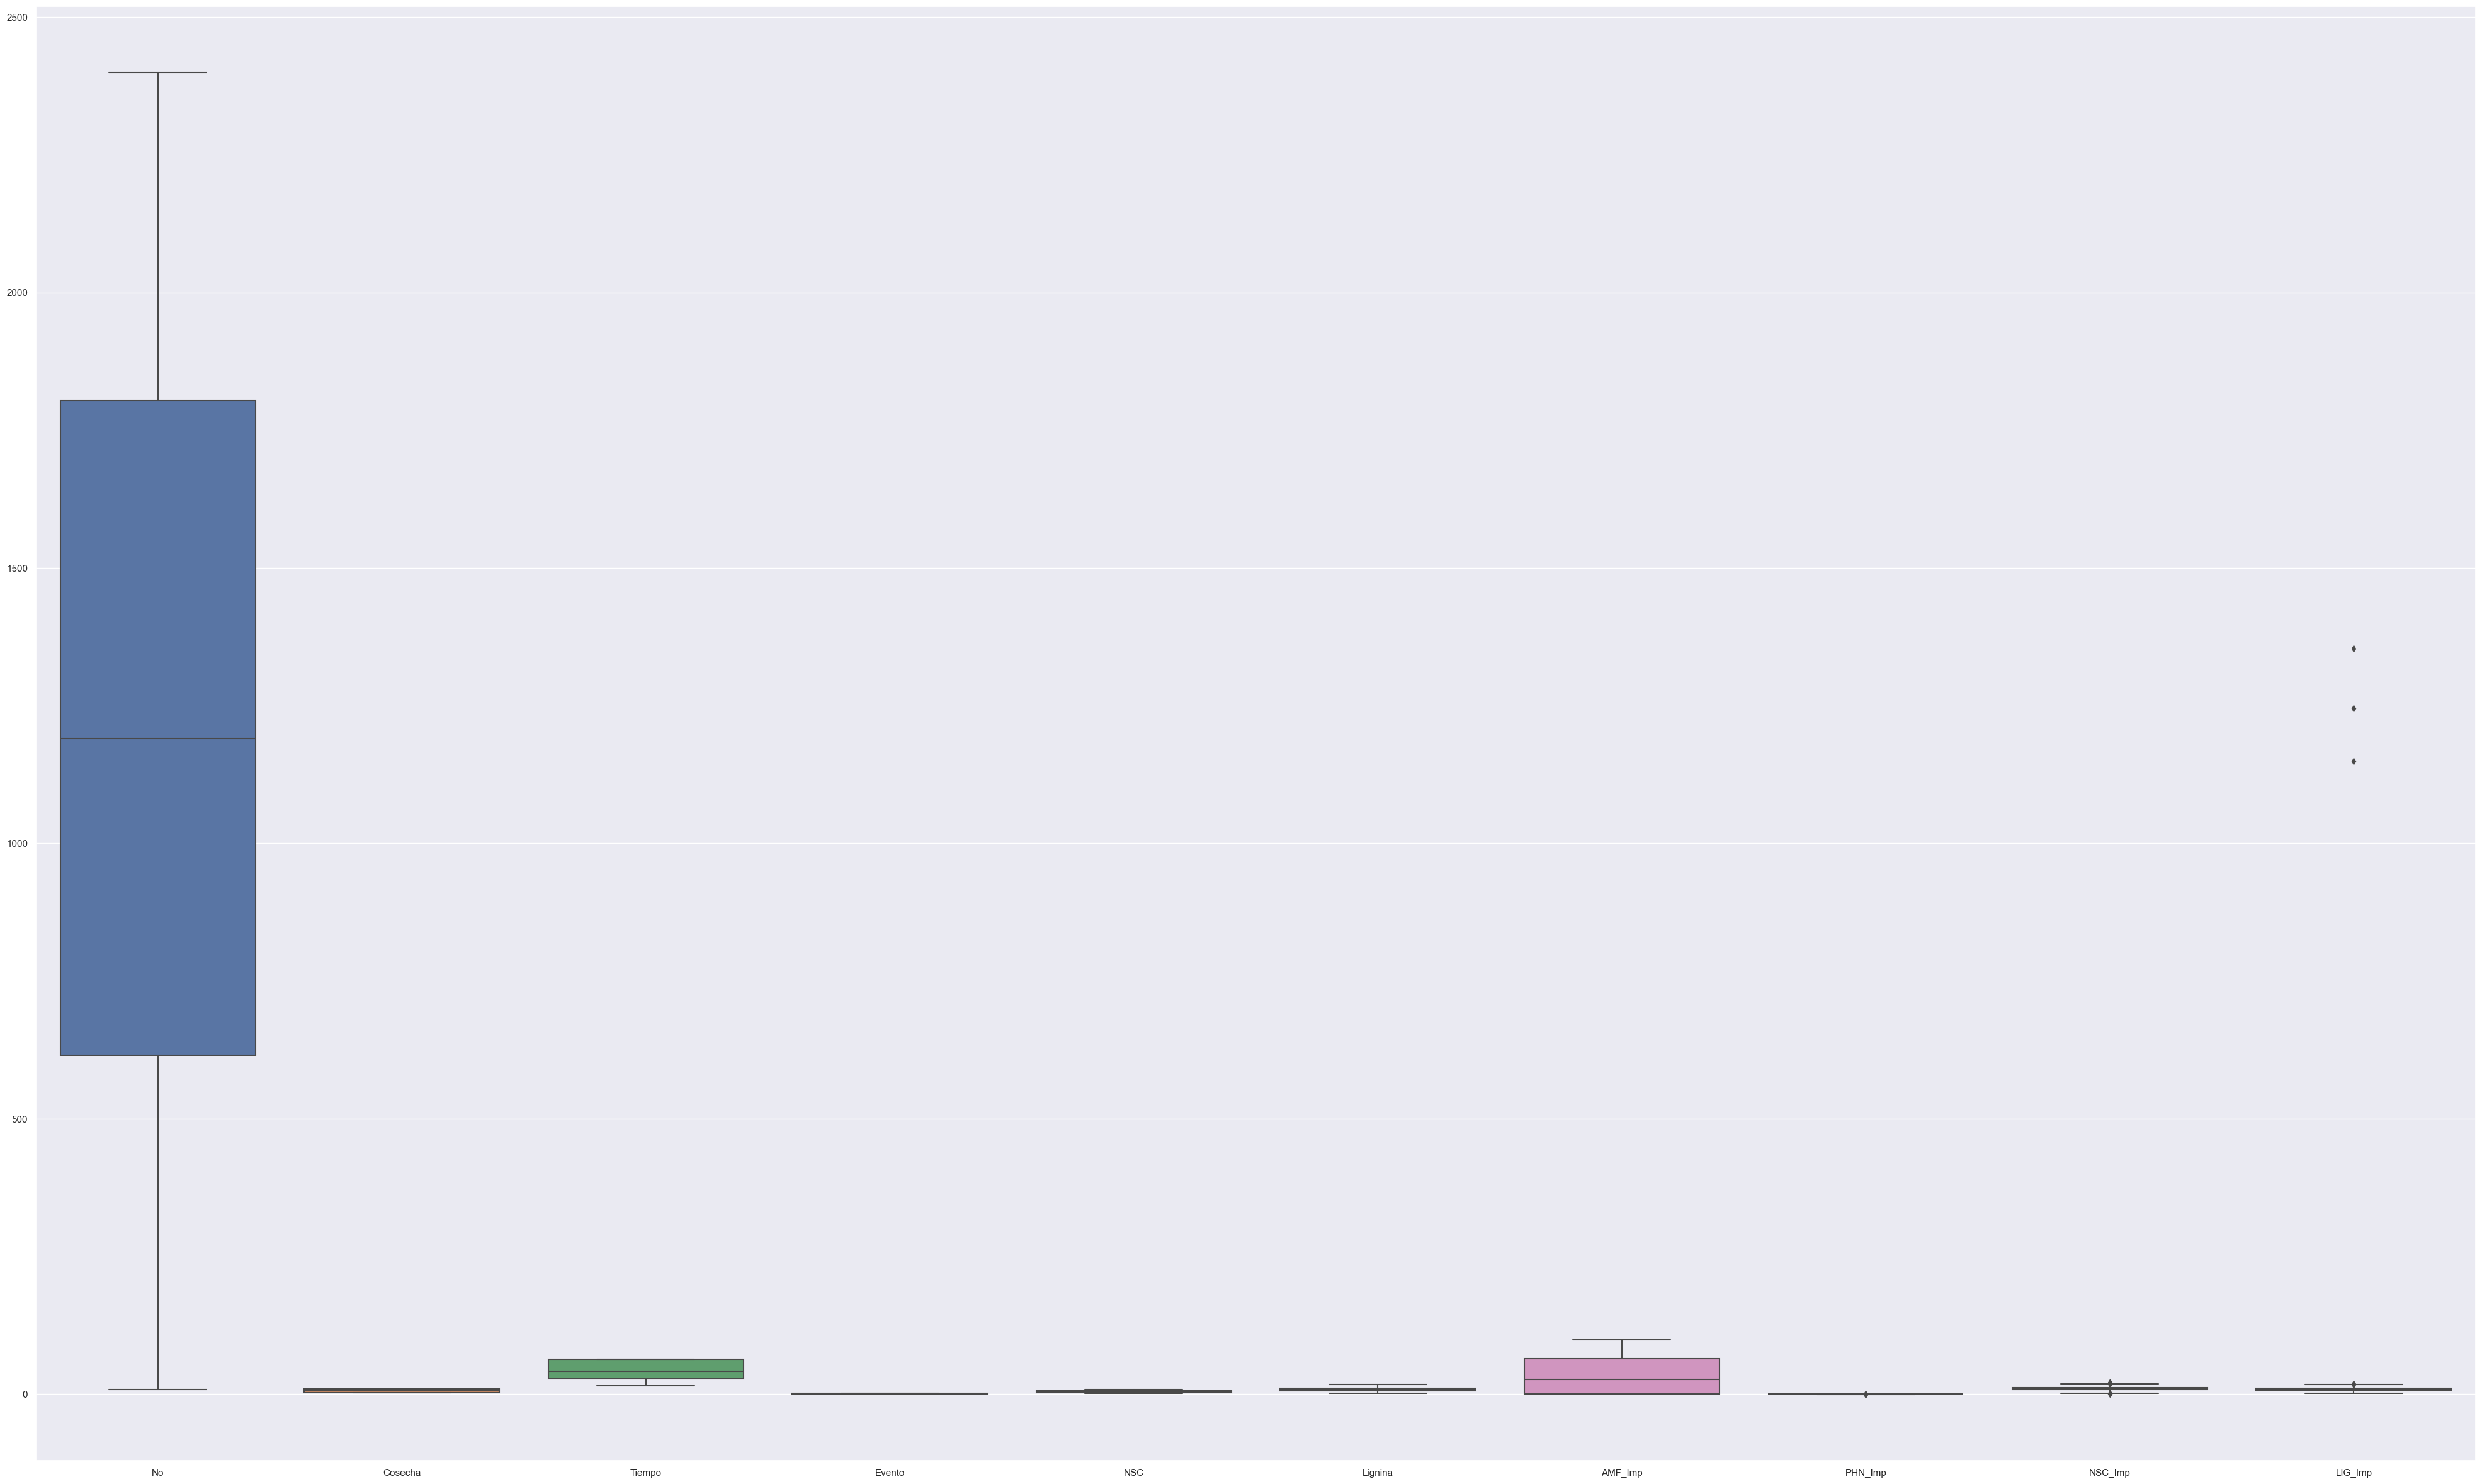

In [46]:
# Visualización de todas las variables
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=df_plantas, orient="v")
print(">> Se visualizan los datos en conjunto: ")
plt.show()

Ya que se tienen escalas significativamente diferentes, se procede a normalizar los datos, para que que cada columna contribuya de manera igual al análisis y evitar cualquier sesgo causado por las diferencias en las escalas.

Para normalizar los datos, utilizaremos la técnica de escala Min-Max, que transforma cada valor en una columna a un valor entre 0 y 10 basado en los valores mínimo y máximo en esa columna.

Una vez que los datos estén normalizados, podemos proceder con el entendimiento de los datos al poder observarlos mejor.


>> Se visualizan los datos normalizados: 


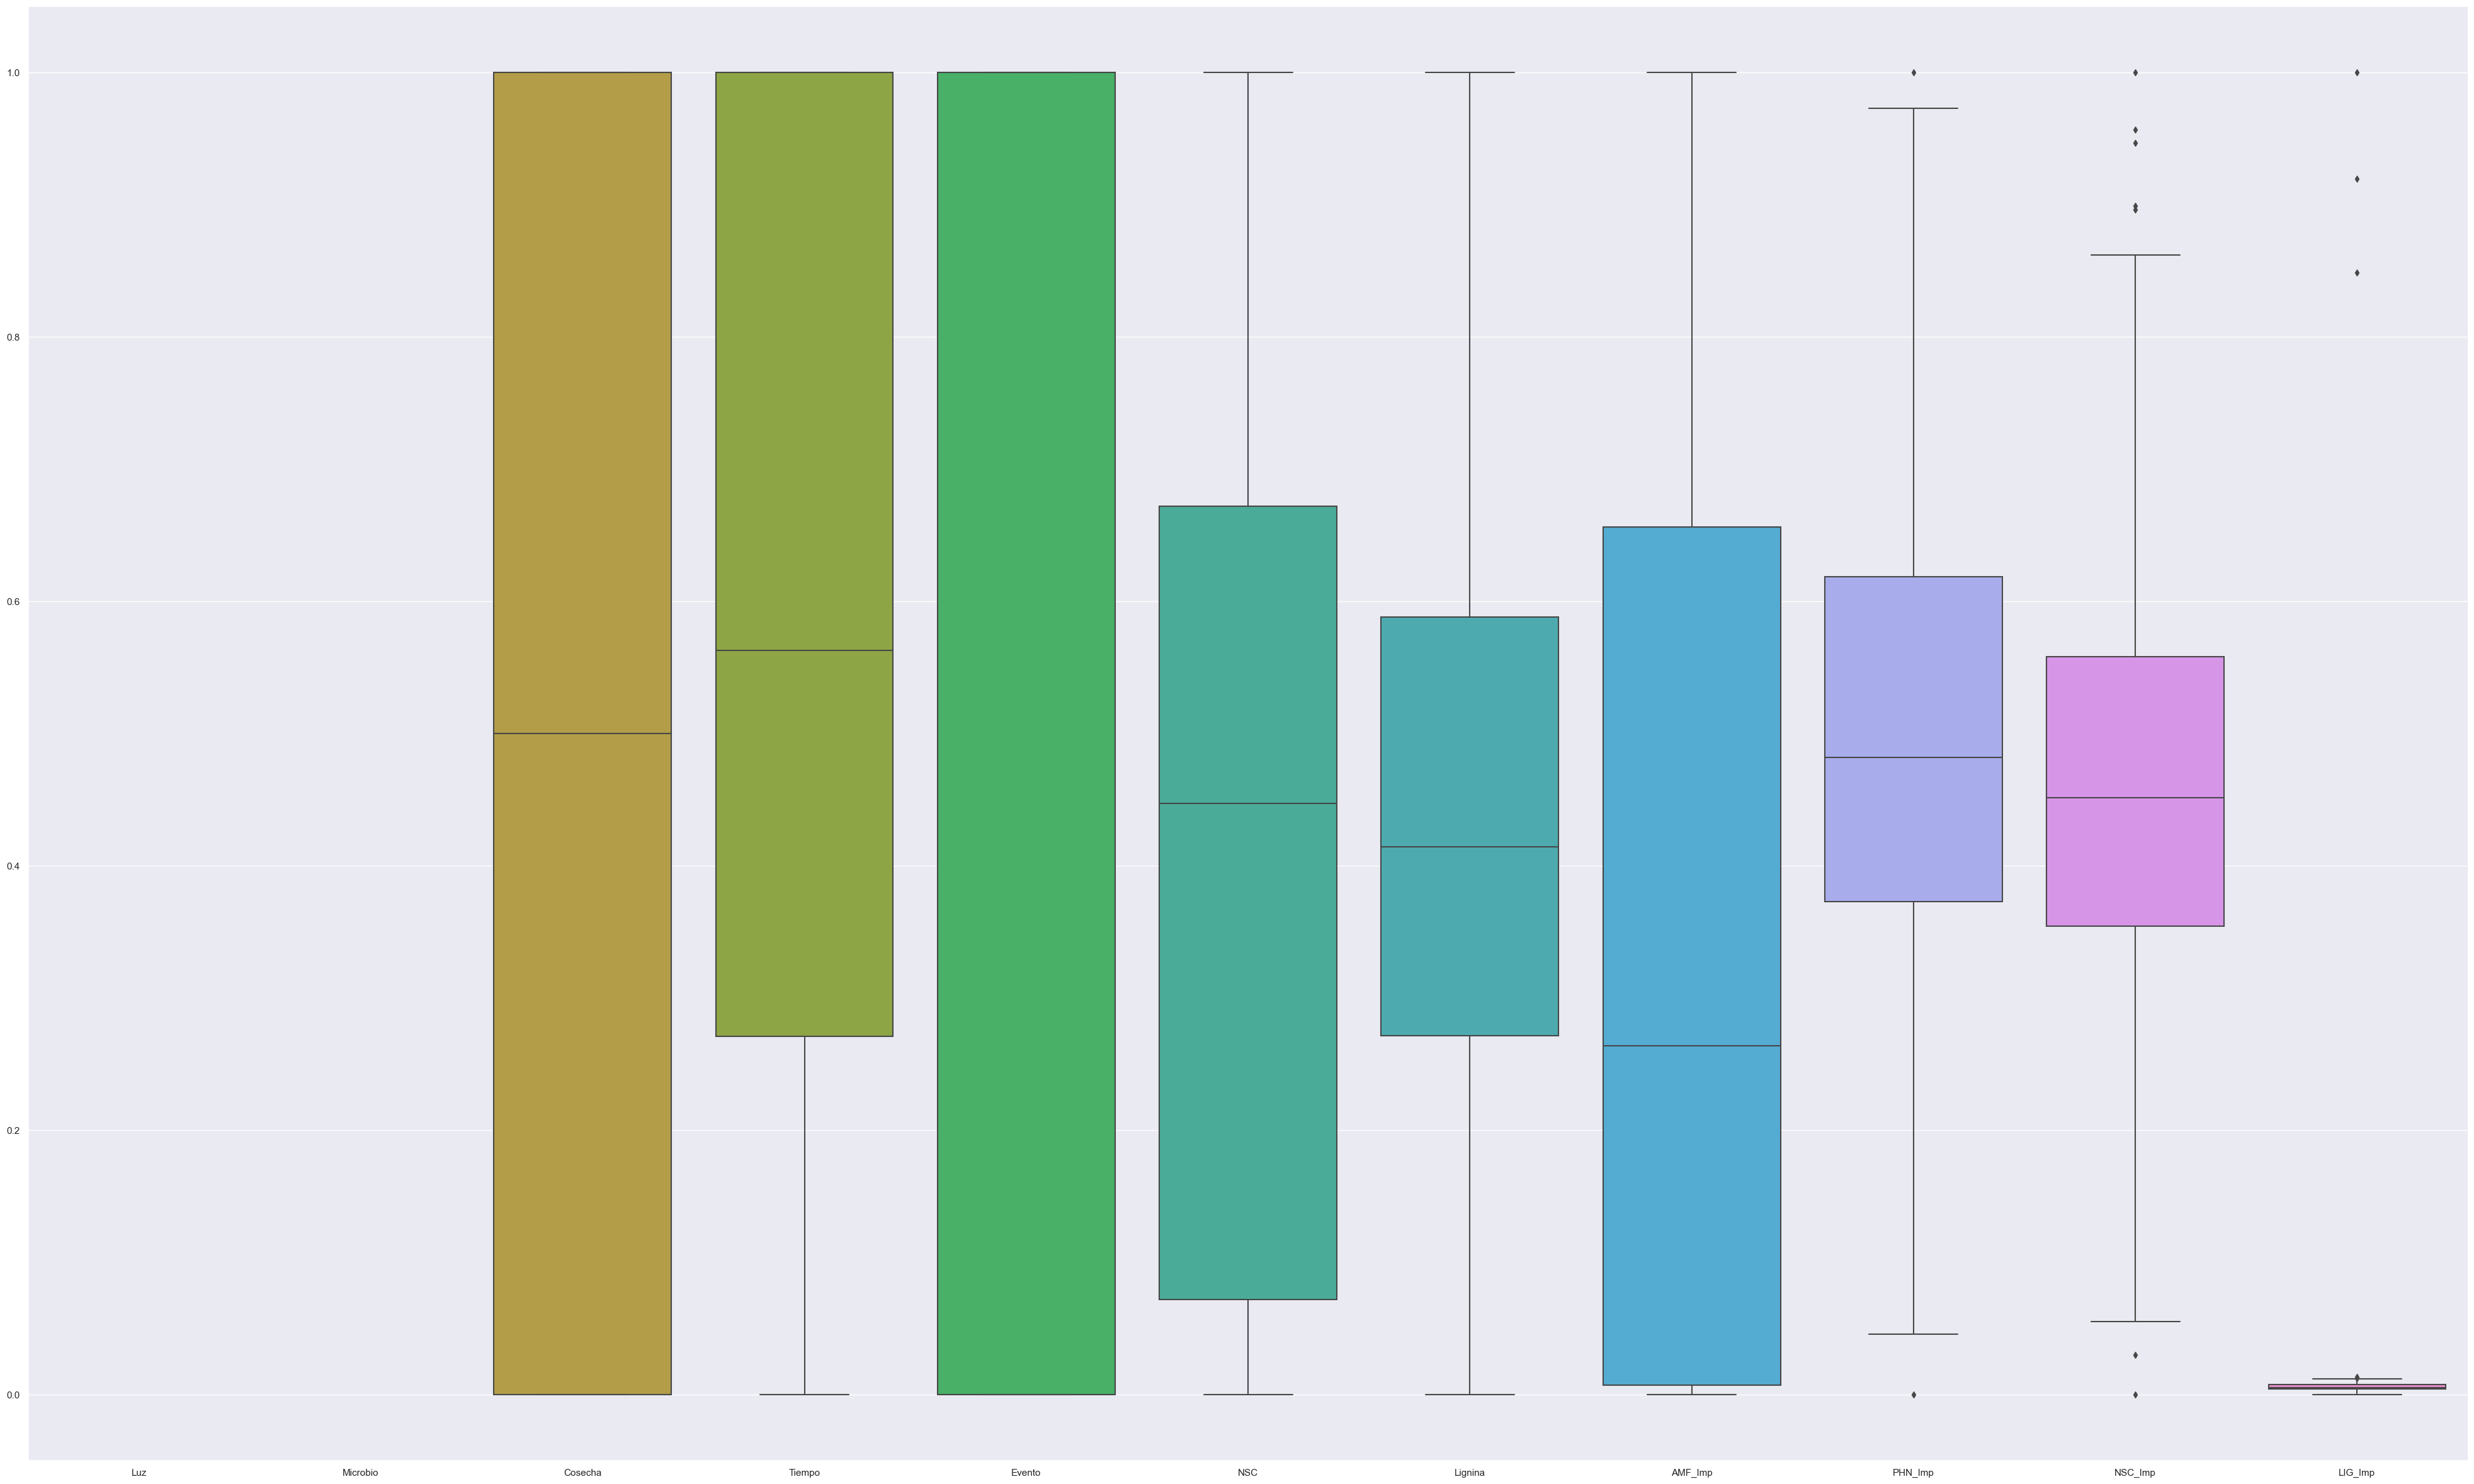

In [47]:
scaler = MinMaxScaler()
df_plantas_copy2 = df_plantas.copy()
df_plantas_copy2.drop(['No'], axis=1, inplace=True)
df_plantas_copy2.drop(['Especie'], axis=1, inplace=True)
df_plantas_copy2['Luz'] = pd.to_numeric(df_plantas['Luz'], errors='coerce')
df_plantas_copy2['Microbio'] = pd.to_numeric(df_plantas['Microbio'], errors='coerce')
df_plantas_copy2['Evento'] = pd.to_numeric(df_plantas['Evento'], errors='coerce')
df_normalized = pd.DataFrame(scaler.fit_transform(df_plantas_copy2), columns=df_plantas_copy2.columns)
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=df_normalized, orient="v")
print(">> Se visualizan los datos normalizados: ")
plt.show()

Se planea eliminar 'No' ya que actúa como identificadores, pero se hará más adelante después del análisis de duplicados.  

No se observa conjunto de datos que tenga un aspecto incoherente o con datos que afecten el análisis inicialmente, excepto 'LIG_Imp' esto se verifica posteriormente por métodos de análisis.

<h5>1.2. Calidad de datos</h5>

En esta sección se identifican los datos que son incorrectos.

In [48]:
print(">> Se puede observar la información detallada de cada columna:\n")
df_plantas.info()

>> Se puede observar la información detallada de cada columna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        1207 non-null   int64  
 1   Especie   1207 non-null   object 
 2   Luz       1207 non-null   object 
 3   Microbio  1207 non-null   object 
 4   Cosecha   727 non-null    float64
 5   Tiempo    1207 non-null   int64  
 6   Evento    1207 non-null   int64  
 7   NSC       13 non-null     float64
 8   Lignina   713 non-null    float64
 9   AMF_Imp   1207 non-null   float64
 10  PHN_Imp   1207 non-null   float64
 11  NSC_Imp   1207 non-null   float64
 12  LIG_Imp   1207 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 122.7+ KB


<p> >> Se observa que las columnas 'Especie', 'Luz' y 'Microbio' son de tipo 'object' . Recordemos que el algoritmo consume números por lo que tendremos que cambiar esto mas adelante </p> Se revisa que las categorias que deberían ser numéricas si lo sean y si no se buscan los datos que no correspondan.

In [49]:
non_numeric_balance = df_plantas[pd.to_numeric(df_plantas['Luz'], errors='coerce').isnull()]
print(">> A continuación se muestran los datos no numéricos de la columna:\n")
print(non_numeric_balance[['No', 'Evento', 'Cosecha', 'Tiempo', 'NSC', 'Lignina', 'AMF_Imp', 'PHN_Imp', 'NSC_Imp', 'LIG_Imp']])


>> A continuación se muestran los datos no numéricos de la columna:

        No  Evento  Cosecha  Tiempo  NSC  Lignina  AMF_Imp  PHN_Imp  NSC_Imp  \
0        8       0      3.0      21  NaN     9.11    55.07    -0.05     5.64   
1       10       0      3.0      21  NaN     4.66    36.00    -0.01     6.37   
2       22       1      NaN      22  NaN      NaN    64.93     0.03     7.65   
3       23       0      9.0      63  NaN     9.87    71.00     0.00     8.02   
4       32       0      6.0      42  NaN    14.51    62.00     0.13    11.11   
...    ...     ...      ...     ...  ...      ...      ...      ...      ...   
1202  2368       1      NaN      63  NaN      NaN     1.42     0.12     9.83   
1203  2381       1      NaN      29  NaN      NaN     1.42     0.12     9.83   
1204  2386       1      NaN      63  NaN      NaN    24.94     0.45    16.33   
1205  2390       1      NaN      63  NaN      NaN    24.67     0.45    16.01   
1206  2395       0      3.0      21  NaN     3.82  

Efectivamente se observa que las variables que corresponden a datos numéricos sí están bien representadas. 

<h5>1.2.1. Análisis de completitud</h5>

In [50]:

print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
(df_plantas.isnull().sum()/df_dim[0]*100).sort_values(ascending=False)

>> Los porcentajes de valores nulos en cada columna son los siguientes: 


NSC         98.922949
Lignina     40.927920
Cosecha     39.768020
No           0.000000
Especie      0.000000
Luz          0.000000
Microbio     0.000000
Tiempo       0.000000
Evento       0.000000
AMF_Imp      0.000000
PHN_Imp      0.000000
NSC_Imp      0.000000
LIG_Imp      0.000000
dtype: float64

In [51]:
print(">> Se verifica que el número de valores nulos en NSC es",
      df_plantas['NSC'].isnull().sum())
print(">> Se verifica que el número de valores nulos en Lignina es",
      df_plantas['Lignina'].isnull().sum())
print(">> Se verifica que el número de valores nulos en Cosecha es",
      df_plantas['Cosecha'].isnull().sum())

>> Se verifica que el número de valores nulos en NSC es 1194
>> Se verifica que el número de valores nulos en Lignina es 494
>> Se verifica que el número de valores nulos en Cosecha es 480


Teniendo en cuenta este valor tan alto de valores nulos en NSC, muy superiores al 50% se toma la decisión de elíminar la columna NSC. En cuanto a Cosecha y Lignina más adelante se relizará imputación de estos datos para procurar no perder la información que nos pueda representar finalmente en el modelo. 

<h5>1.2.2. Análisis de unicidad</h5>

In [52]:
print(">> Se observa que no hay valores duplicados, pues de {} datos hay {} ID únicos".format(df_plantas.shape[0], df_plantas['No'].nunique()))
print(">> Existen {} valores duplicados".format(df_plantas.shape[0] - df_plantas['No'].nunique()))
print(">> Los valores de las demás columnas pueden no ser únicos, por lo que no se consideran duplicados")

>> Se observa que no hay valores duplicados, pues de 1207 datos hay 1207 ID únicos
>> Existen 0 valores duplicados
>> Los valores de las demás columnas pueden no ser únicos, por lo que no se consideran duplicados


<h5>1.2.3. Análisis de consistencia</h5>

In [53]:
print("Conteos de Luz:")
counts = df_plantas.Luz.value_counts().sort_index()
print(counts)

print("\nConteos de Microbio:")
counts = df_plantas.Microbio.value_counts().sort_index()
print(counts)

print("\nConteos de Especie:")
counts = df_plantas.Especie.value_counts().sort_index()
print(counts)

print("\nConteos de Evento:")
counts = df_plantas.Evento.value_counts().sort_index()
print(counts)

Conteos de Luz:
Luz
Alta    595
Baja    612
Name: count, dtype: int64

Conteos de Microbio:
Microbio
Combinado    308
Control      298
Grande       297
Pequeño      304
Name: count, dtype: int64

Conteos de Especie:
Especie
Acne    403
Acru    404
Acsa    400
Name: count, dtype: int64

Conteos de Evento:
Evento
0    701
1    506
Name: count, dtype: int64


Se planean modificar estas variables categoricas para que en el modelo se representen como numéricas y así el algoritmo se pueda ejecutar correctamente.

<h5>1.2.4. Análisis de validez</h5>

In [54]:
# Análisis de validez en valores
valid_values = df_plantas['Cosecha'].isin([3, 6, 9]).all()

# Verificar si los valores están bien o mal y luego imprimir el mensaje correspondiente
if valid_values:
    print("Todos los valores de 'Cosecha' están dentro de los valores esperados.")
else:
    print("Hay valores en 'Cosecha' que no se ajustan a los valores esperados.")
    
# Análisis de validez en valores
valid_values = df_plantas['Microbio'].isin(['Combinado', 'Control','Grande', 'Pequeño']).all()

# Verificar si los valores están bien o mal y luego imprimir el mensaje correspondiente
if valid_values:
    print("Todos los valores de 'Microbio' están dentro de los valores esperados.")
else:
    print("Hay valores en 'Microbio' que no se ajustan a los valores esperados.")

    
valores_especie = df_plantas['Especie'].unique()

categorias_esperadas = ['Acne', 'Acru', 'Acsa']

if all(valor in categorias_esperadas for valor in valores_especie):
    print("Todos los valores de 'Especie' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Especie' que no se ajustan a las categorías definidas en el diccionario de datos.")
    
valores_luz = df_plantas['Luz'].unique()

categorias_esperadas = ['Baja', 'Alta']

if all(valor in categorias_esperadas for valor in valores_luz):
    print("Todos los valores de 'Luz' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Luz' que no se ajustan a las categorías definidas en el diccionario de datos.")
    
valores_Evento = df_plantas['Evento'].unique()

categorias_esperadas = [0, 1]

if all(valor in categorias_esperadas for valor in valores_Evento):
    print("Todos los valores de 'Evento' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Evento' que no se ajustan a las categorías definidas en el diccionario de datos.")
    

Hay valores en 'Cosecha' que no se ajustan a los valores esperados.
Todos los valores de 'Microbio' están dentro de los valores esperados.
Todos los valores de 'Especie' están dentro de las categorías esperadas.
Todos los valores de 'Luz' están dentro de las categorías esperadas.
Todos los valores de 'Evento' están dentro de las categorías esperadas.


<h5>Finalmente se utiliza la libreria pandas_profiling, la cual permite realizar un análisis exploratorio de los datos de forma rápida en conjunto con la librería pandas que permite obtener información estadística de los datos. </h5>

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

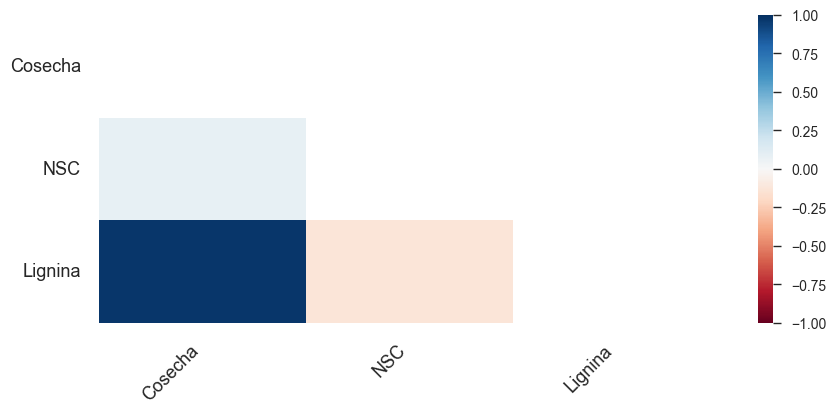

In [55]:
profile = ProfileReport(df_plantas, title="Reporte de plantas")
profile.to_notebook_iframe()
profile.to_file("Plantas.html")

<strong><h4>2. Preparación de los datos</h4></strong>

<h5>2.1. Solución de tipos de dato</h5>

Previamente se observó que hay datos que  no corresponden a datos numéricos.

Para resolver este problema es necesario convertir esas columnas, ya que no puede ser manejados en el programa.

Decidimos eliminar la columna NSC ya que no contribuye al modelo pues una está llena de vacíos.

In [56]:
# Eliminamos columnas que no queremos
df_plantas.drop(['NSC'], axis=1, inplace=True)

# Codificación One-Hot para 'Luz' , 'Microbio', 'Especie' 
df_plantas = pd.get_dummies(df_plantas, columns=['Luz', 'Microbio', 'Especie'])

print(">> Se observan los nuevos valores de los tipos de datos, siendo todos numéricos:\n")
df_plantas.info()

>> Se observan los nuevos valores de los tipos de datos, siendo todos numéricos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  1207 non-null   int64  
 1   Cosecha             727 non-null    float64
 2   Tiempo              1207 non-null   int64  
 3   Evento              1207 non-null   int64  
 4   Lignina             713 non-null    float64
 5   AMF_Imp             1207 non-null   float64
 6   PHN_Imp             1207 non-null   float64
 7   NSC_Imp             1207 non-null   float64
 8   LIG_Imp             1207 non-null   float64
 9   Luz_Alta            1207 non-null   bool   
 10  Luz_Baja            1207 non-null   bool   
 11  Microbio_Combinado  1207 non-null   bool   
 12  Microbio_Control    1207 non-null   bool   
 13  Microbio_Grande     1207 non-null   bool   
 14  Microbio_Pequeño    12

<h5>2.2. Solución de problema de validez</h5>

Decidimos eliminar 'No' y ya que funciona como identificador y es posible que afecten el modelo final.

In [57]:
df_plantas.drop(['No'], axis=1, inplace=True)
print(">> Se observan los nuevos datos, siendo todos numéricos:\n")
df_plantas.info()

>> Se observan los nuevos datos, siendo todos numéricos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cosecha             727 non-null    float64
 1   Tiempo              1207 non-null   int64  
 2   Evento              1207 non-null   int64  
 3   Lignina             713 non-null    float64
 4   AMF_Imp             1207 non-null   float64
 5   PHN_Imp             1207 non-null   float64
 6   NSC_Imp             1207 non-null   float64
 7   LIG_Imp             1207 non-null   float64
 8   Luz_Alta            1207 non-null   bool   
 9   Luz_Baja            1207 non-null   bool   
 10  Microbio_Combinado  1207 non-null   bool   
 11  Microbio_Control    1207 non-null   bool   
 12  Microbio_Grande     1207 non-null   bool   
 13  Microbio_Pequeño    1207 non-null   bool   
 14  Especie_Acne        1207 non-null   bool   
 1

Corregimos Cosecha con la moda y Lignina con la media. 

In [58]:
 # Reemplazar valores faltantes en 'Cosecha' con la moda
cosecha_moda = df_plantas['Cosecha'].mode()[0]  # Calcula la moda de 'Cosecha'
df_plantas['Cosecha'] = df_plantas['Cosecha'].fillna(cosecha_moda)

# Reemplazar valores faltantes en 'Lignina' con la media
lignina_media = df_plantas['Lignina'].mean()  # Calcula la media de 'Lignina'
df_plantas['Lignina'] = df_plantas['Lignina'].fillna(lignina_media)


Se sabe también que existen valores en la columna LIG_Imp que son atípicos, los cuales no deben ser incluídos en  el análisis.

In [59]:
# Filtrar los valores que son menores o iguales a 100 en la columna 'LIG_Imp'
df_plantas_filtrado = df_plantas[df_plantas['LIG_Imp'] <= 100]


<h5>2.3. Solución de problema de completitud</h5>

Habiendo eliminado datos inválidos se procede a ver el porcentaje de los datos faltantes para tomar decisiones.

In [60]:
print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
(df_plantas.isnull().sum()/df_dim[0]*100).sort_values(ascending=False)

>> Los porcentajes de valores nulos en cada columna son los siguientes: 


Cosecha               0.0
Luz_Baja              0.0
Especie_Acru          0.0
Especie_Acne          0.0
Microbio_Pequeño      0.0
Microbio_Grande       0.0
Microbio_Control      0.0
Microbio_Combinado    0.0
Luz_Alta              0.0
Tiempo                0.0
LIG_Imp               0.0
NSC_Imp               0.0
PHN_Imp               0.0
AMF_Imp               0.0
Lignina               0.0
Evento                0.0
Especie_Acsa          0.0
dtype: float64

<h5>2.4. Solución de problema de unicidad</h5>

Ya que no se encontraron duplicados se prosigue con el análisis.

Se preparan los datos que se van a usar en el modelamiento.

>> Se visualizan los datos en conjunto: 


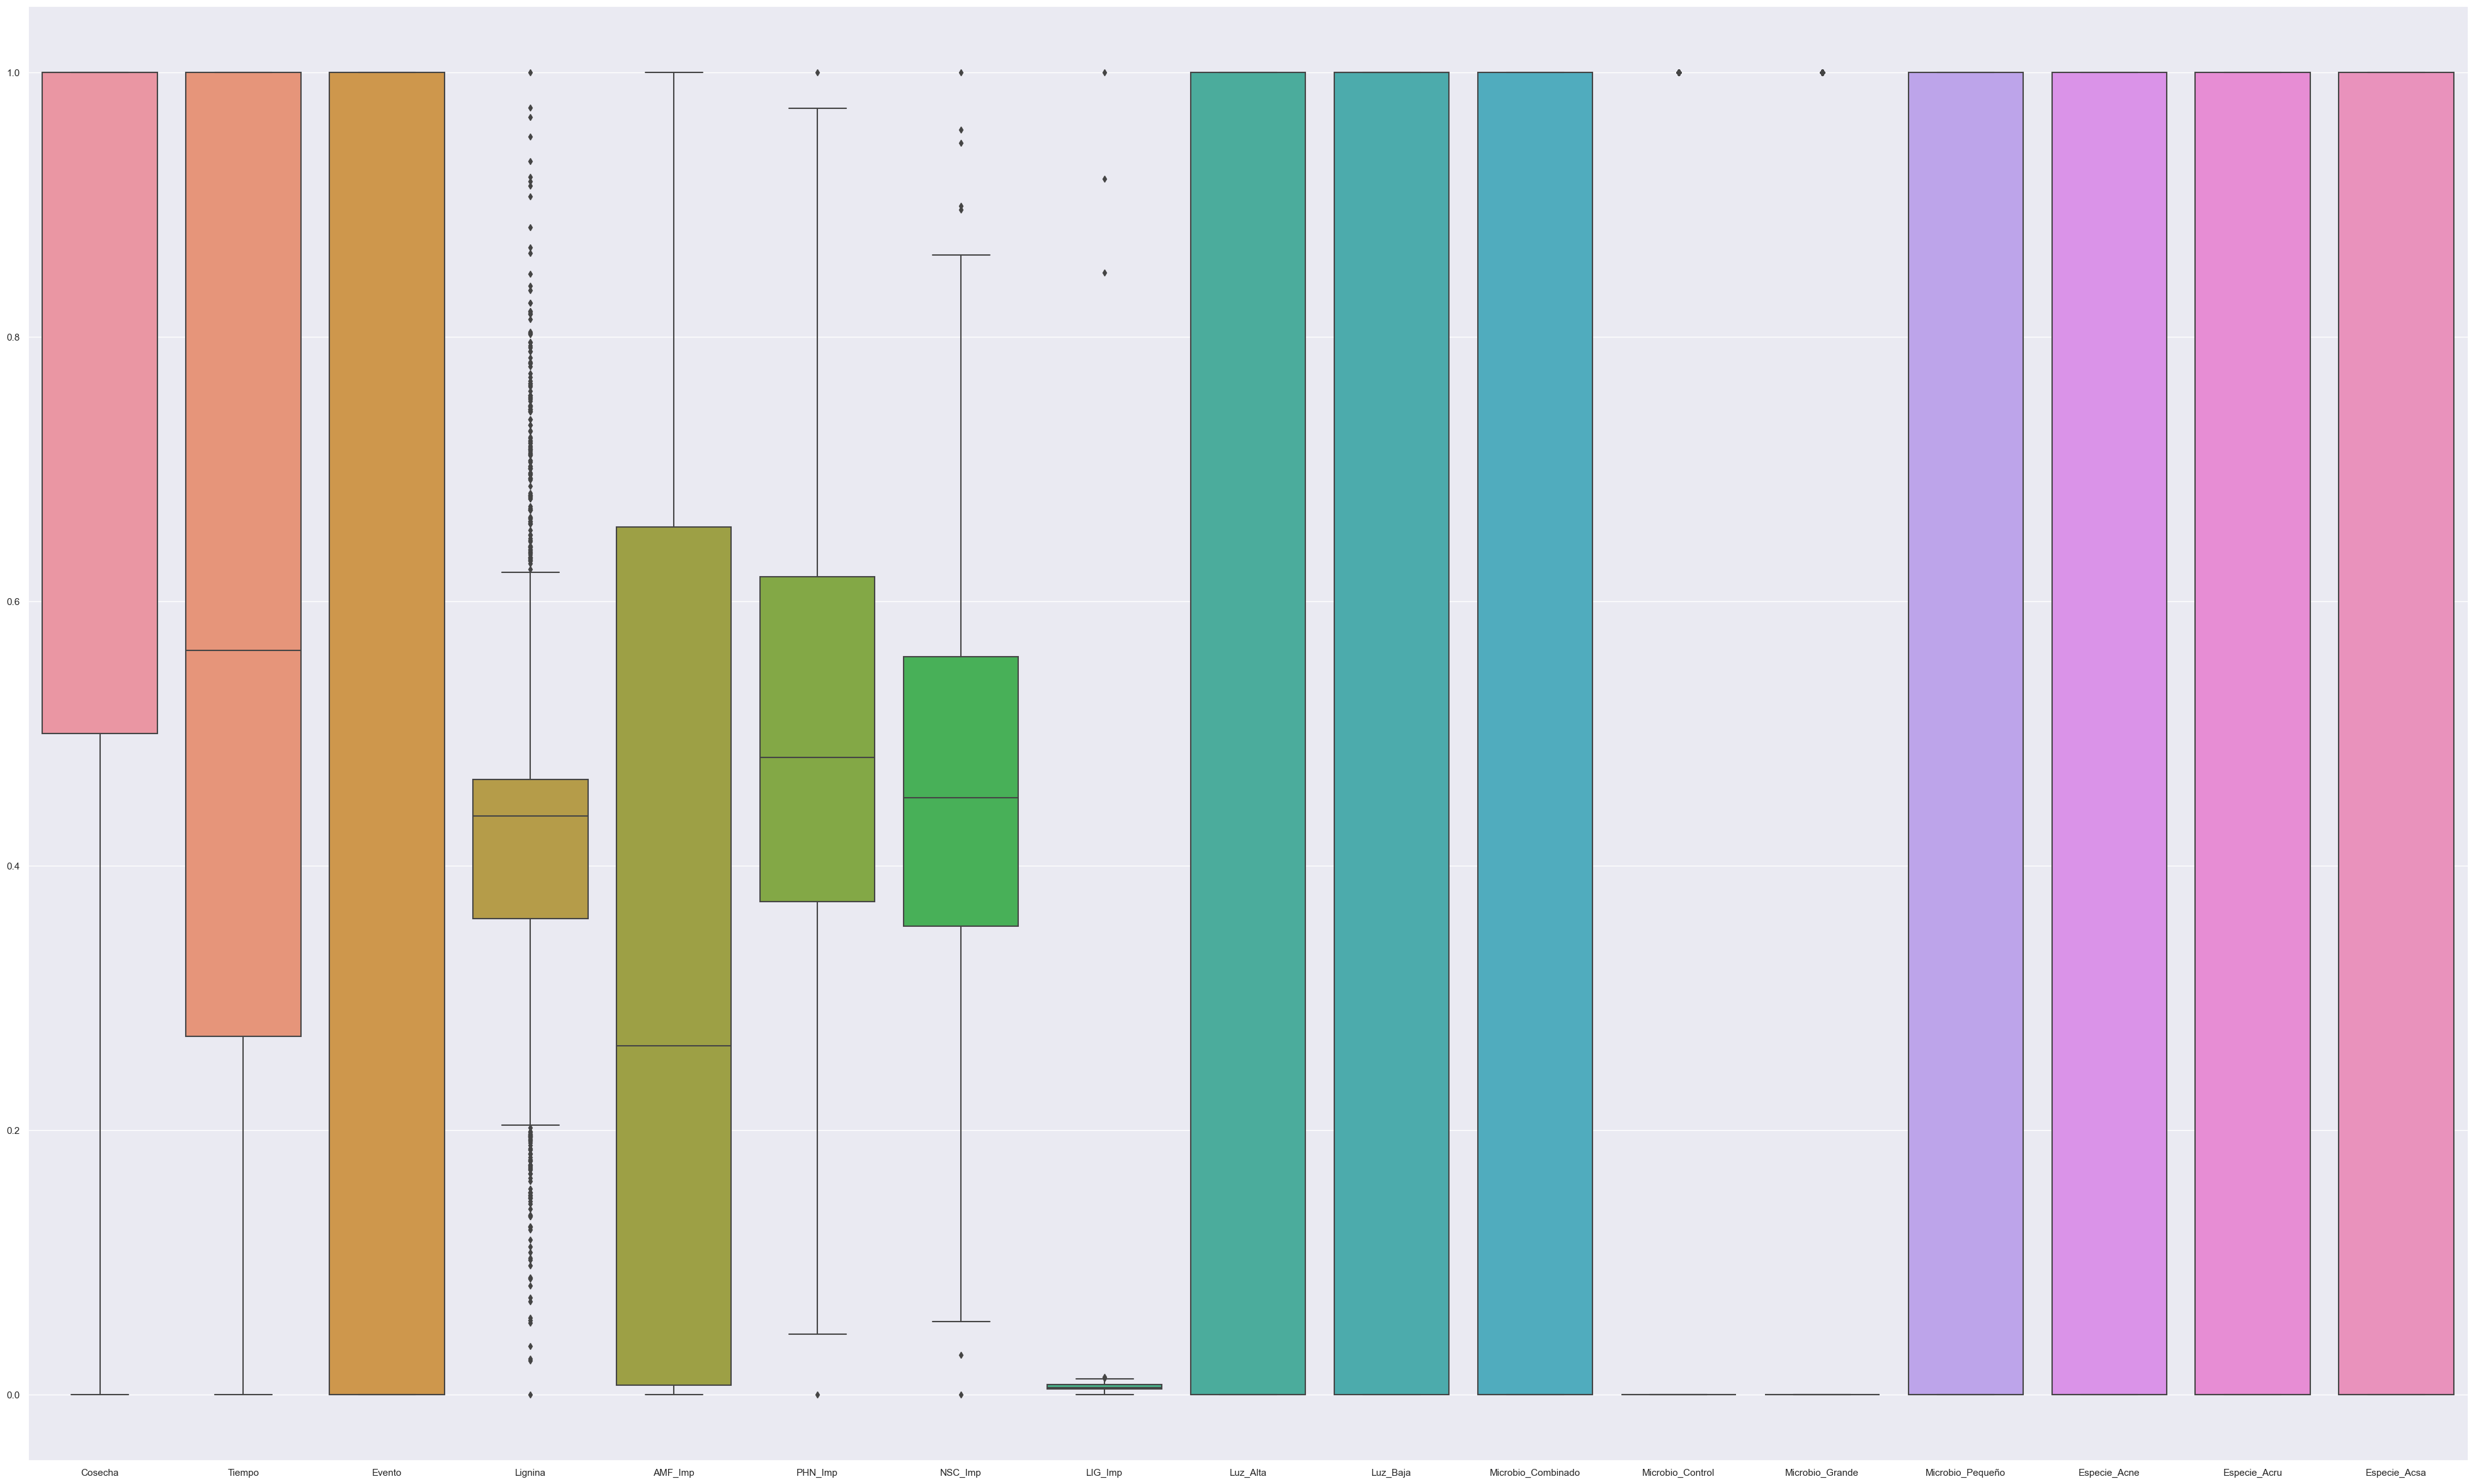

In [61]:
df_plantas_copy = df_plantas.copy()
df_plantas_norm = pd.DataFrame(scaler.fit_transform(df_plantas_copy), columns=df_plantas_copy.columns)

fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=df_plantas_norm, orient="v")
print(">> Se visualizan los datos en conjunto: ")
plt.show()

<strong><h4>3. Modelamiento</h4></strong>

Viendo el significado de las columnas, sus relaciones y teniendo como norte el perfilamiento en grupos homogéneos, con características y comportamientos similares, su consideran las siguientes columnas como prioridad para el perfilamiento inicial:

<ul>
<li>Luz</li>
<li>Evento</li>
    Lignina
    AMF_imp
</ul>

Se procede a hacer el análisis de las variables con combinaciones consideradas significativas.

In [70]:

df_model = df_plantas_norm[["Luz_Alta", "Luz_Baja", "Evento","Lignina", "AMF_Imp"]].copy()
df_model.drop_duplicates(keep='first', inplace=True)
df_model

Luz_Alta  Luz_Baja  Evento   Lignina   AMF_Imp
0          0.0       1.0     0.0  0.473459  0.556397
1          0.0       1.0     0.0  0.201952  0.363829
2          0.0       1.0     1.0  0.437630  0.655963
3          0.0       1.0     0.0  0.519829  0.717257
4          0.0       1.0     0.0  0.802929  0.626376
...        ...       ...     ...       ...       ...
1199       1.0       0.0     0.0  0.577791  0.000303
1200       1.0       0.0     0.0  0.503966  0.014642
1204       1.0       0.0     1.0  0.437630  0.252146
1205       1.0       0.0     1.0  0.437630  0.249419
1206       1.0       0.0     0.0  0.150702  0.000909

[893 rows x 5 columns]

Se construyen las funciones que permiten conocer el coeficiente silueta y la gráfica de distorsión que permite usar el método del codo.

In [71]:
def plot_distortion(data,
                    k_min=1,
                    k_max=11,
                    ylabel='Distortion',
                    xlabel='Number of clusters'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=777)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min, k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [72]:


def plot_distortion_hierachical(data,
                    num_min=1,
                    num_max=11,
                    ylabel='Distortion',
                    xlabel='Number of clusters'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    num_min : int
        Valor mínimo para num
    num_max : int
        Valor máximo para num
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    linkage_values = []
    for n_clusters in range(1, 11):
        model = AgglomerativeClustering(n_clusters=n_clusters)
        model.fit(data)
        linkage_values.append(model.distances_)
    plt.plot(range(num_min, num_max), linkage_values, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [73]:
def plot_silhouette(data,
                    labels,
                    ylabel='Grupos',
                    xlabel="Coeficiente de silueta"):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                         labels,
                                         metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

<h5>3.1. Algoritmo K-means</h5>

En este caso, se utilizan las variables "Luz", "Lignina", "AMF_imp" y "Evento" como características para la agrupación. El objetivo es identificar patrones y segmentar en grupos con características comunes.

Teniendo esto en cuenta, para iniciar, se colocó un número de 2 clusters para comenzar el procedimiento de agrupación y se analizaron los coeficientes de silueta y la inercia para este dato, por o tanto se probaron valores del 2 al 4, concluyendo que 2 es la mejor opción como se muestra a continuación.

Se coloca un número de 2 clusters para hacer el agrupamiento y poder analizar por métodos de decisión cuál es el número óptimo de clusters.

In [80]:
k = 2
model_kmeans = KMeans(n_clusters=k, random_state=777) 
res_kmeans = model_kmeans.fit(df_model)

print(">> El modelo se cargó con un número de {} grupos".format(k))

>> El modelo se cargó con un número de 2 grupos


Se observa la distribución de la cantidad de datos clasificado en cada uno de los grupos formados pr el algoritmo K-means para mejor entendimiento de lo que está ocurriendo en estos grupos.

<Axes: xlabel='GROUP', ylabel='Cantidad de datos'>

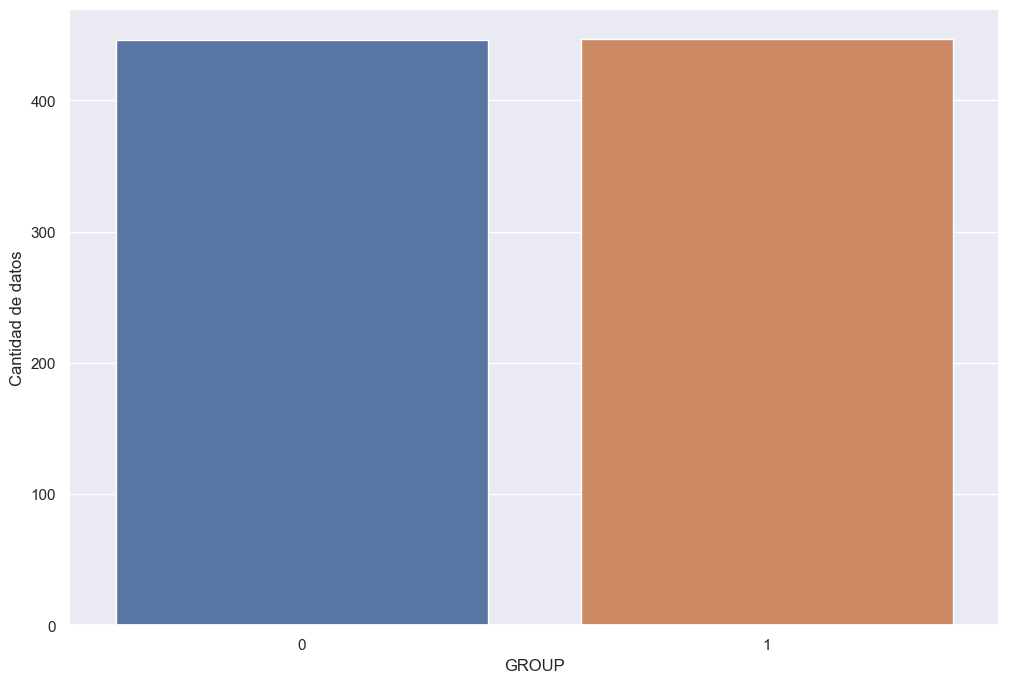

In [81]:
labels = res_kmeans.labels_
df_model = df_model.copy()
df_model['GROUP'] = labels

cluster_distrib = df_model['GROUP'].value_counts()

fig = plt.figure(figsize=(12, 8))
plt.xlabel("N° del grupo")
plt.ylabel("Cantidad de datos")
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values)

Se observa que los grupos son significativamente similares en tamaño, por lo que se considera un buen comienzo en la aproximación de los grupos.

Por otra parte, se quiere visualizar la distribución de los grupos en los datos elegidos para conformarlos:

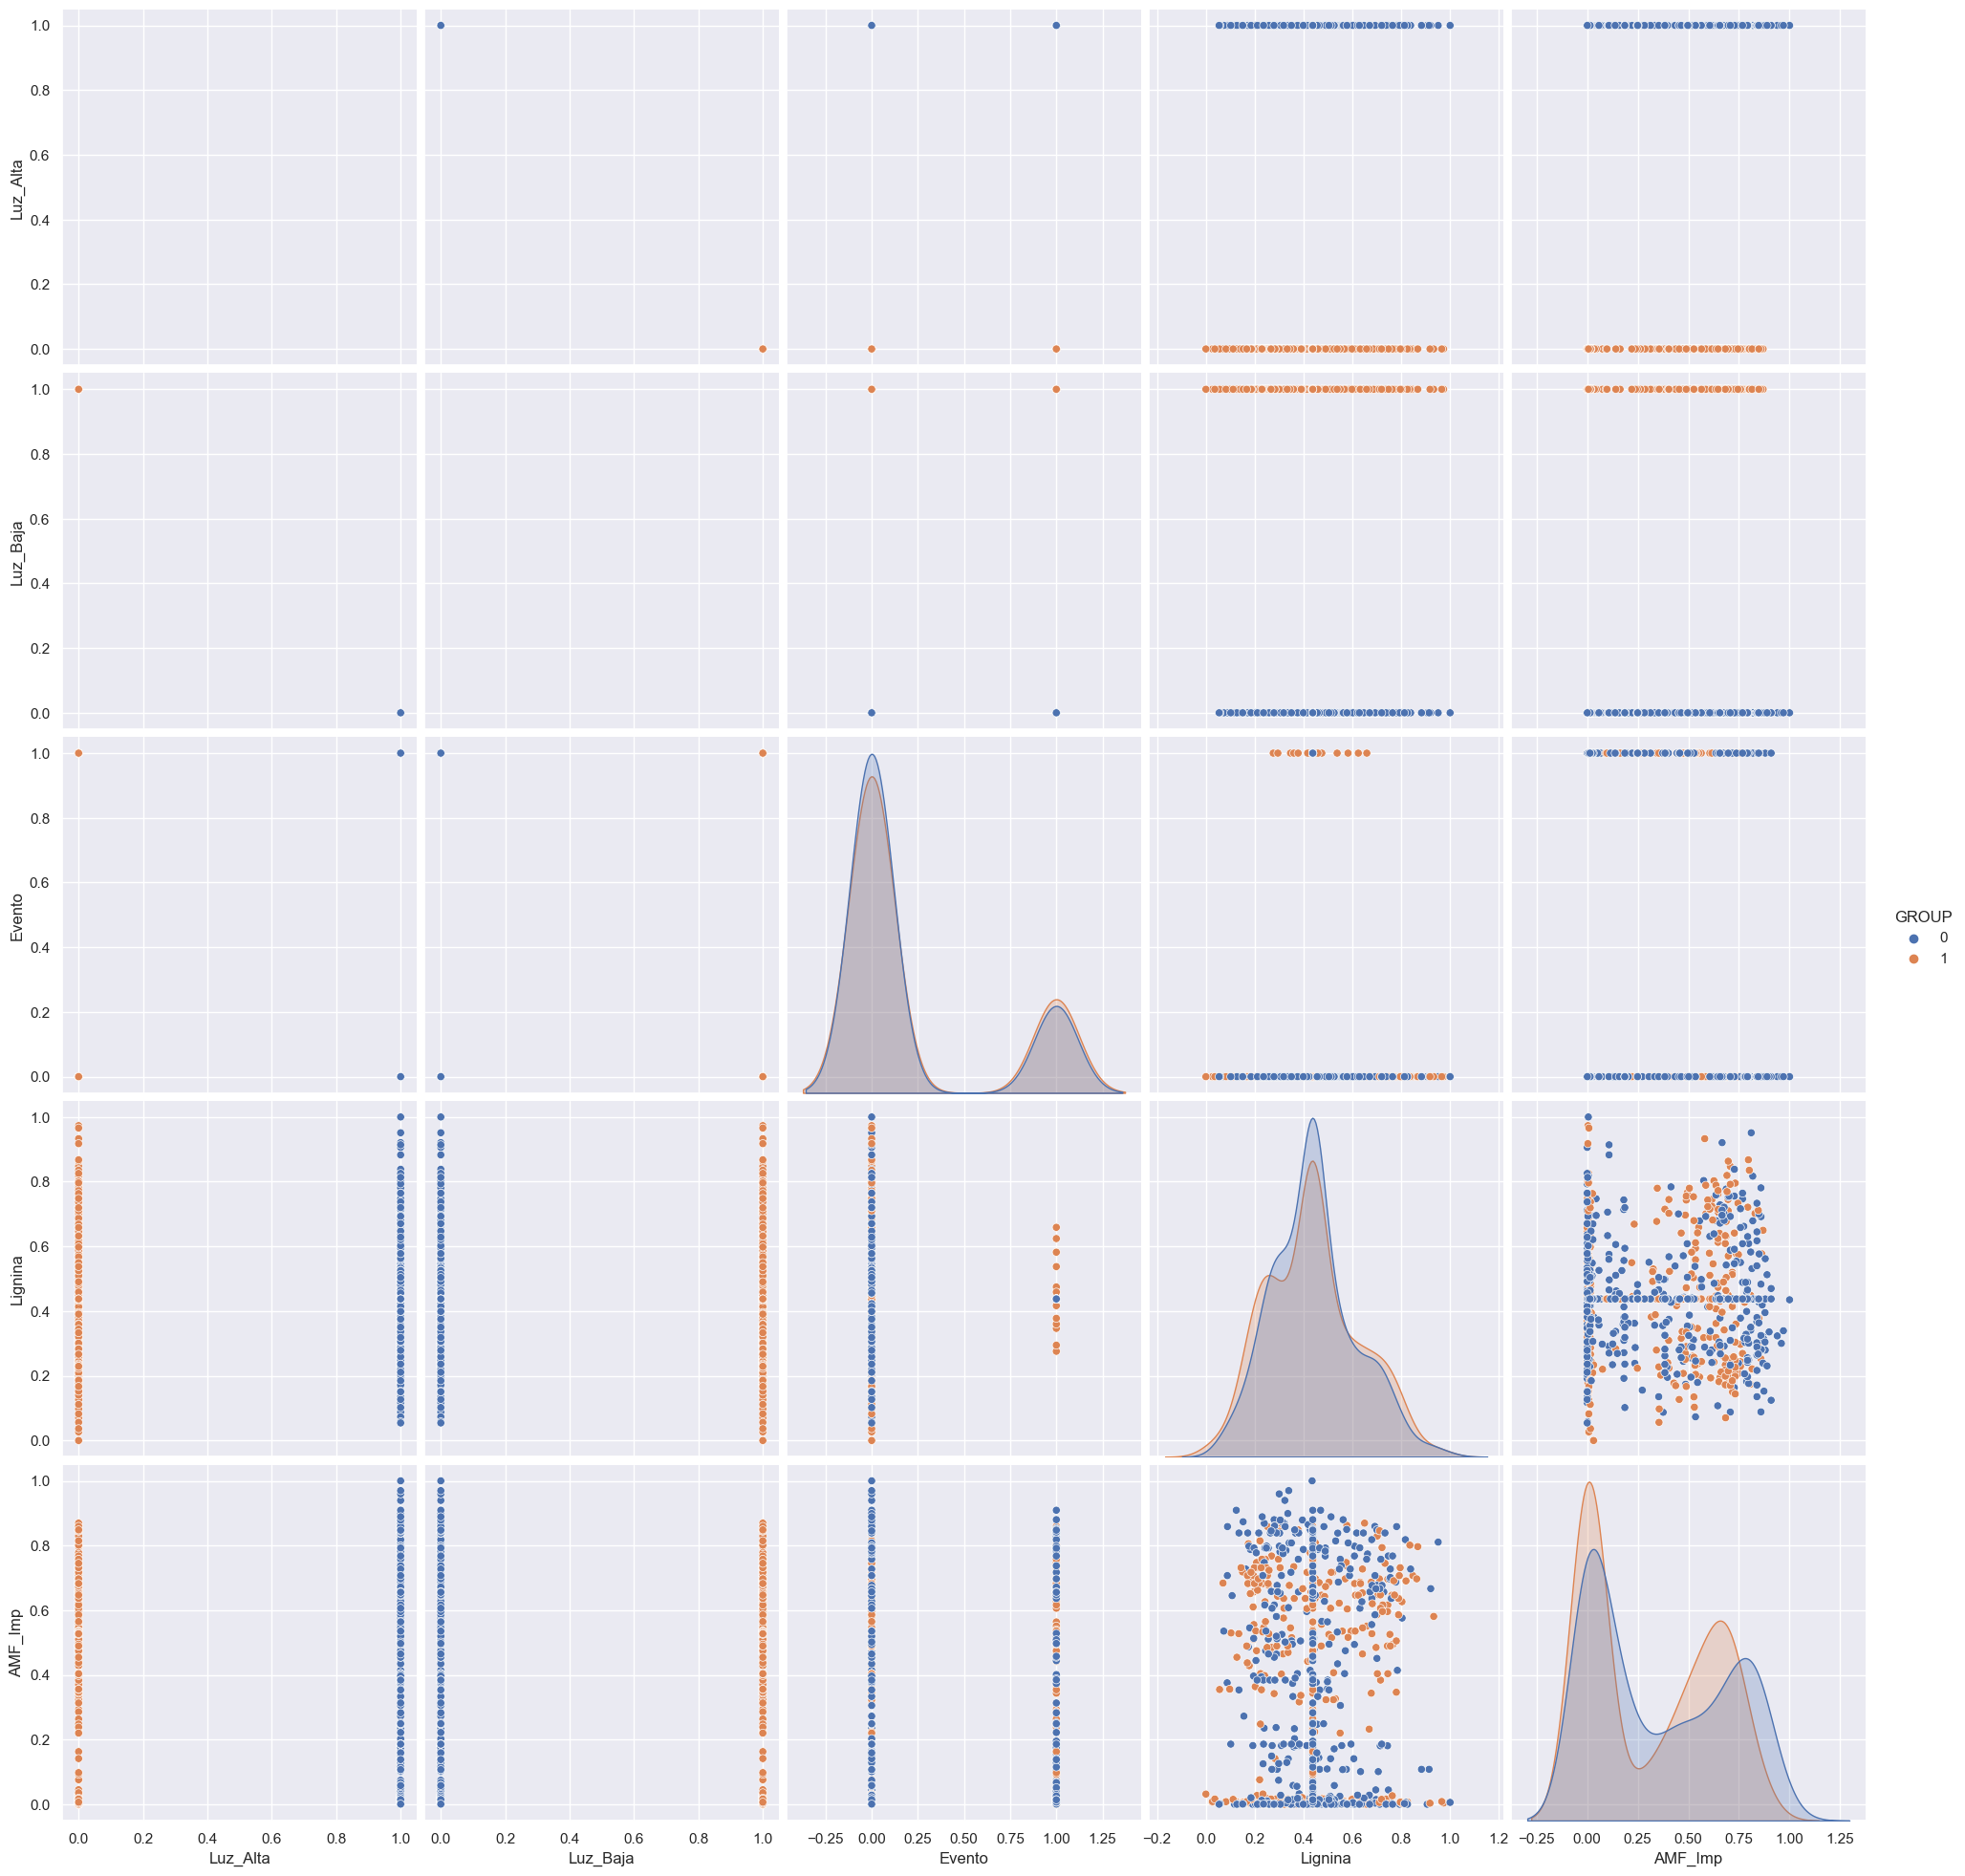

In [82]:
cols_number = df_model.to_numpy()
sns.pairplot(data=df_model, hue="GROUP", height=4)

En las gráficas se puede observar que en lo posible los grupos no están contenidos unos dentro de otros en cuanto a las gráficas de dispersión, se considera que al sobrelaparse lo menos posible, 2 es un buen candidato para la cantidad de grupos, pues, se cambió este parámetro (que se discute más adelante su justificación) y se observó mayor sobrelapamiento con otras cantidades numéricas.

A continuación, se muestra la gráfica de distorsión, que sirve como heurística para aproximar el número de grupos ideal para el algoritmo.

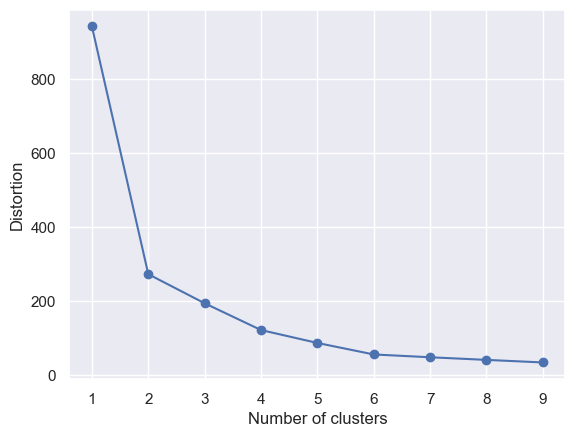

In [85]:
plot_distortion(df_model, 1, 10)

Se observa que el punto de inflección o codo se observa en el número 2 del <i>eje x</i>, por lo que se considera una decisión acertada haber escogido 2 grupos. También se usa a manera de confirmación de el hiperparámetro escogido.

Por otra parte, se realiza la gráfica del coeficiente silueta para cada uno de los grupos para poder determinar por este método también el número apropiado de grupos.

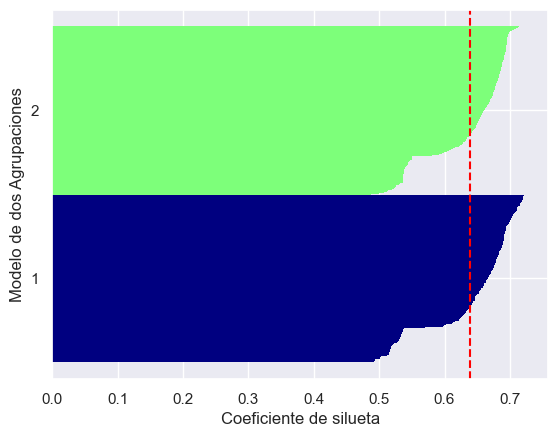

In [86]:
plot_silhouette(data=df_model,
                labels=res_kmeans.labels_,
                ylabel='Modelo de dos Agrupaciones')

Se observa que los valores se esta cerca al 0,64 aproximadamente

In [87]:
print(">> Se observa la inercia de didferentes números de grupo como parámetr de K-means:\n")

for k in range(1, 4):
    model = KMeans(n_clusters=k, random_state=777)
    model.fit(df_model)
    inertia = model.inertia_
    print(f"Número de grupos: {k} - Inercia: {inertia}")


>> Se observa la inercia de didferentes números de grupo como parámetr de K-means:

Número de grupos: 1 - Inercia: 943.2107733518958
Número de grupos: 2 - Inercia: 272.9077119213855
Número de grupos: 3 - Inercia: 194.1572033615336


Se observa que a medida que los grupos se aumentan la inercia disminuye, siendo lo deseado, pues esta se relaciona con la variación de los datos y mide la compacidad de los datos.

Se guarda el modelo obtenido nuevo.

In [88]:
df_kmeans = df_model.copy()
df_model.drop_duplicates(keep='first', inplace=True)